<a href="https://colab.research.google.com/github/Yash1289/play_store_data_Eda/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
file_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Python For DataScience/Play Store Capstone Project/Play Store Data.csv"
play_store_df = pd.read_csv(file_path)

In [10]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
arbitary_ratings = play_store_df[play_store_df["Rating"] > 5]
arbitary_ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
index = play_store_df["Rating"].argmax()
play_store_df.iloc[index , 1: ] = play_store_df.iloc[index , 1: ].shift()
play_store_df.loc[index ,"Rating"] = float(play_store_df.loc[index ,"Rating"])
play_store_df.loc[index ,"Reviews"] = float(play_store_df.loc[index ,"Reviews"])

In [15]:
play_store_df["Rating"] = np.where(play_store_df["Rating"].isna(), play_store_df["Rating"].mean() , play_store_df["Rating"]  )

In [16]:
play_store_df.drop_duplicates(subset ="App" , keep="first",inplace=True)
play_store_df["Reviews"] = play_store_df["Reviews"].astype(int)

In [17]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             9660 non-null   object
 1   Category        9659 non-null   object
 2   Rating          9660 non-null   object
 3   Reviews         9660 non-null   int64 
 4   Size            9660 non-null   object
 5   Installs        9660 non-null   object
 6   Type            9659 non-null   object
 7   Price           9660 non-null   object
 8   Content Rating  9660 non-null   object
 9   Genres          9659 non-null   object
 10  Last Updated    9660 non-null   object
 11  Current Ver     9652 non-null   object
 12  Android Ver     9658 non-null   object
dtypes: int64(1), object(12)
memory usage: 1.0+ MB


In [18]:
play_store_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
def stringToInt(installs):
  if installs == "0":
    return int(installs)
  else :
    return int(installs[:-1].replace(",",""))

In [20]:
play_store_df["Installs"] = play_store_df["Installs"].apply(stringToInt)

In [21]:
app_with_1m_downloads = play_store_df[play_store_df["Installs"] >= 1000000]
highest_rated_apps = app_with_1m_downloads[app_with_1m_downloads["Rating"] == app_with_1m_downloads["Rating"].max()]
highest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,1000000,Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,1000000,Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,26M,1000000,Free,0,Everyone,Education;Education,"July 20, 2018",2.16.11.10,4.2 and up
1258,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,38098,11M,5000000,Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.4,4.2 and up
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,13M,10000000,Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
1307,StrongLifts 5x5 Workout Gym Log & Personal Tra...,HEALTH_AND_FITNESS,4.9,66791,10M,1000000,Free,0,Everyone,Health & Fitness,"July 30, 2018",Varies with device,Varies with device
7000,PixPanda - Color by Number Pixel Art Coloring ...,FAMILY,4.9,55723,14M,1000000,Free,0,Everyone,Entertainment,"June 4, 2018",3.3,4.0.3 and up
9625,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Varies with device,10000000,Free,0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device


In [22]:
lowest_rated_apps = app_with_1m_downloads[app_with_1m_downloads["Rating"] == app_with_1m_downloads["Rating"].min()]
lowest_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5048,AppFinder by AppTap,TOOLS,2,2221,4.9M,5000000,Free,0,Everyone,Tools,"October 3, 2017",1.8.2.7,5.0 and up


In [23]:
highest_installed_apps = app_with_1m_downloads.sort_values(by =["Installs", "Reviews"] , ascending=[False, False] , ignore_index = True)[:10]
highest_installed_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
5,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
6,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
7,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
8,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
9,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device


In [24]:
most_reviewed_app = play_store_df[play_store_df["Reviews"] == play_store_df["Reviews"].max()]
most_reviewed_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


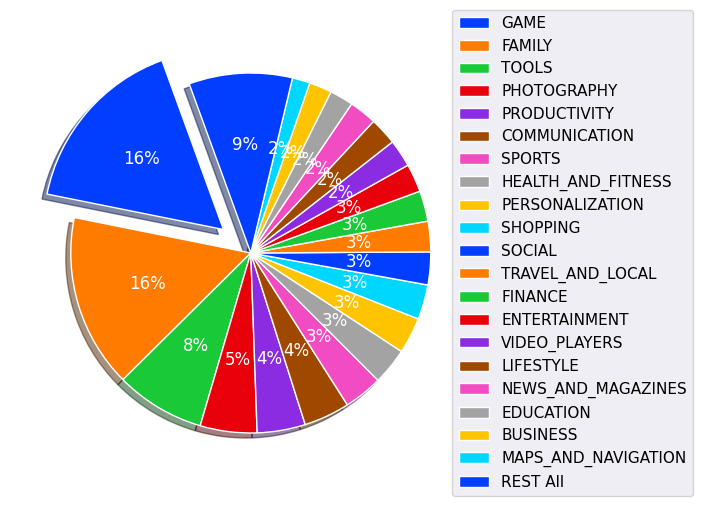

In [73]:
category_wise_apps = app_with_1m_downloads["Category"].value_counts()
category_wise_apps_list = category_wise_apps.index.tolist()
category_wise_apps_count = list(category_wise_apps.values)

# for index, x in enumerate(category_wise_apps_count):
#   if index <=  :
#     slicingIndex = index
#     break
slicingIndex = 20

category_wise_apps_list = category_wise_apps_list[:slicingIndex]
category_wise_apps_count_new = category_wise_apps_count[:slicingIndex]
sumofRest = sum(category_wise_apps_count[slicingIndex:])
category_wise_apps_list.append("REST All")
category_wise_apps_count_new.append(sumofRest)

totalCategories = len(category_wise_apps_count_new)

fig_1 = plt.figure(figsize=(8,5),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(category_wise_apps_count_new, explode=explode, labels = category_wise_apps_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=110, 
                                    textprops=dict(color="w"))

plt.legend(wedges, category_wise_apps_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

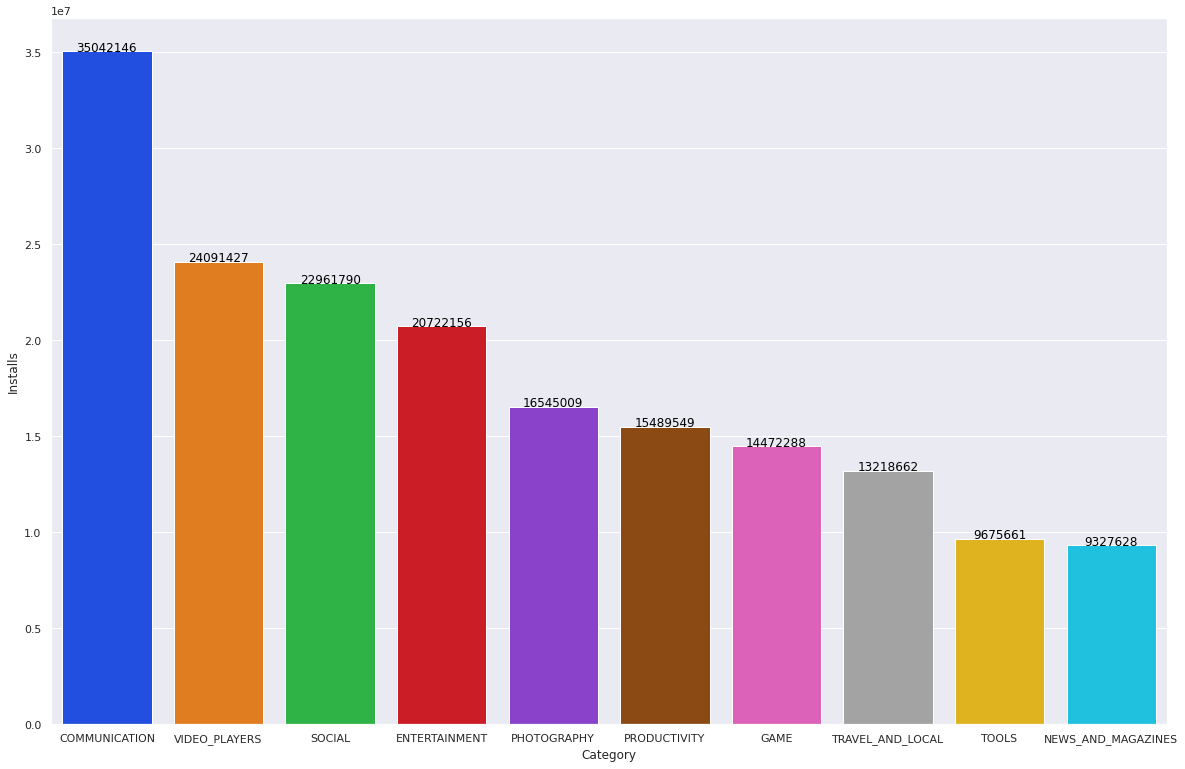

In [50]:
installs_groupby = play_store_df.groupby("Category").agg({ "Installs" : "mean"}).reset_index().sort_values(by = "Installs" , ascending=False ,ignore_index=True)[:10]
installs_groupby["Installs"] = installs_groupby["Installs"].astype("int64")
installs_groupby

plt.rcParams['figure.figsize'] = 20,13
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Category',y='Installs',data = installs_groupby, palette = 'bright',estimator = np.mean)
for index, row in installs_groupby.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")

In [27]:
play_store_df["Rating"] = play_store_df["Rating"].astype("float64")
ratings_groupby = play_store_df.groupby("Category").agg({"Rating" : "mean"}).reset_index()
ratings_groupby


,Category,Rating
0,ART_AND_DESIGN,4.349602
1,AUTO_AND_VEHICLES,4.190567
2,BEAUTY,4.260503
3,BOOKS_AND_REFERENCE,4.308334
4,BUSINESS,4.133256
5,COMICS,4.181840
6,COMMUNICATION,4.134601
7,DATING,4.018047
8,EDUCATION,4.362954
9,ENTERTAINMENT,4.135294


In [28]:
highest_across_category = play_store_df.groupby(["Category"]).agg({ "Installs" : "max" , "App" : "first"}).reset_index()
highest_across_category

,Category,Installs,App
0,ART_AND_DESIGN,50000000,Photo Editor & Candy Camera & Grid & ScrapBook
1,AUTO_AND_VEHICLES,10000000,Monster Truck Stunt 3D 2019
2,BEAUTY,10000000,Hush - Beauty for Everyone
3,BOOKS_AND_REFERENCE,1000000000,Wattpad 📖 Free Books
4,BUSINESS,100000000,Visual Voicemail by MetroPCS
5,COMICS,10000000,LINE WEBTOON - Free Comics
6,COMMUNICATION,1000000000,Messenger – Text and Video Chat for Free
7,DATING,10000000,"Moco+ - Chat, Meet People"
8,EDUCATION,100000000,Duolingo: Learn Languages Free
9,ENTERTAINMENT,1000000000,Netflix


In [29]:
highest_rated_across_category = app_with_1m_downloads.groupby("Category").agg({ "Rating": "max" , "App" : "first"})
highest_rated_across_category

,Rating,App
Category,,
ART_AND_DESIGN,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
AUTO_AND_VEHICLES,4.9,Real Tractor Farming
BEAUTY,4.9,"ipsy: Makeup, Beauty, and Tips"
BOOKS_AND_REFERENCE,4.9,Wattpad 📖 Free Books
BUSINESS,4.8,Visual Voicemail by MetroPCS
COMICS,4.8,LINE WEBTOON - Free Comics
COMMUNICATION,4.8,Messenger – Text and Video Chat for Free
DATING,4.5,Zoosk Dating App: Meet Singles
EDUCATION,4.9,Duolingo: Learn Languages Free


In [30]:
highest_installed_across_content = play_store_df.groupby("Content Rating").agg({ "Installs" : "max" , "App" : "first"})
highest_installed_across_content

,Installs,App
Content Rating,,
Adults only 18+,1000000,Manga Master - Best manga & comic reader
Everyone,1000000000,Photo Editor & Candy Camera & Grid & ScrapBook
Everyone 10+,1000000000,Superheroes Wallpapers | 4K Backgrounds
Mature 17+,500000000,"Secrets of beauty, youth and health"
Teen,1000000000,Sketch - Draw & Paint
Unrated,50000,Best CG Photography


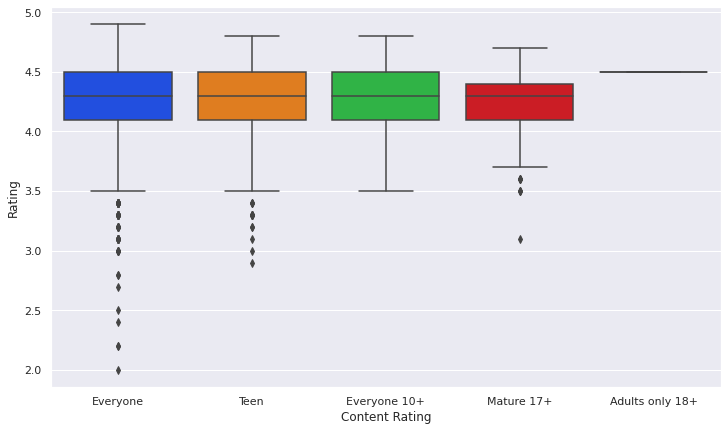

In [64]:
plt.rcParams['figure.figsize'] = 12,7
ax = sns.boxplot(x="Content Rating" , y = "Rating" , data=app_with_1m_downloads , palette="bright")

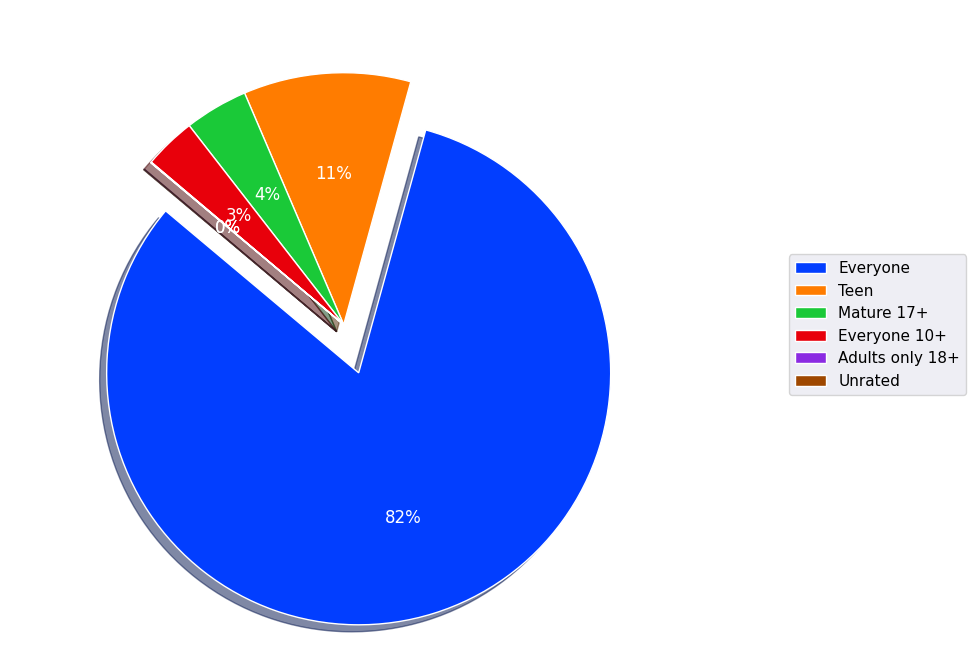

In [76]:
content_rating_count = play_store_df["Content Rating"].value_counts()
content_rating_list = content_rating_count.index.tolist()
content_rating_apps_count = content_rating_count.values

totalCategories = len(content_rating_list)

fig_1 = plt.figure(figsize=(10,7),dpi=100)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
plt.rcParams['text.color'] = 'black'
colors = sns.color_palette('bright')[0:totalCategories]

explode = [0]*totalCategories
explode[0] = 0.2

wedges, texts, autotexts = plt.pie(content_rating_apps_count, explode=explode, labels = content_rating_list, colors=colors, 
                                    autopct='%1.0f%%', shadow=True, startangle=140, 
                                    textprops=dict(color="w"))

plt.legend(wedges, content_rating_list, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

In [31]:

{highest_rated_acorss_content = app_with_1m_downloads.groupby("Content Rating").agg({ "Rating" : "max" , "App" : "first" })
highest_rated_acorss_content


,Rating,App
Content Rating,,
Adults only 18+,4.5,DraftKings - Daily Fantasy Sports
Everyone,4.9,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
Everyone 10+,4.8,Police Detector (Speed Camera Radar)
Mature 17+,4.7,Read books online
Teen,4.8,Sketch - Draw & Paint


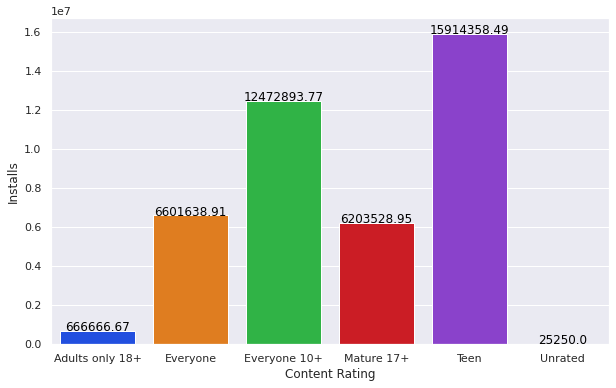

In [51]:
content_installs_mean = play_store_df.groupby("Content Rating").agg({ "Installs" : "mean"}).reset_index()
content_installs_mean
plt.rcParams['figure.figsize'] = 10,6
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')
g = sns.barplot(x='Content Rating',y='Installs',palette = 'bright',data = content_installs_mean ,estimator = np.mean)
for index, row in content_installs_mean.iterrows():
  g.text(row.name,row.Installs, round(row.Installs,2), color='black', ha="center")